# MNIST 손글씨 - CNN v1
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 FCN layer
- 1 Output layer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape,y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# X_train, X_test 정규화(0 ~ 1) & 이미지 차원 변경 : 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation = 'relu'),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(),         # MaxPooling2D(pool_size = (2, 2))
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [8]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [9]:
model_path = 'best-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [10]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
237/240 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9435
Epoch 1: val_loss improved from inf to 0.06065, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 15s 15ms/step - loss: 0.1827 - accuracy: 0.9439 - val_loss: 0.0607 - val_accuracy: 0.9815
Epoch 2/100
236/240 [============================>.] - ETA: 0s - loss: 0.0441 - accuracy: 0.9860
Epoch 2: val_loss improved from 0.06065 to 0.05595, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.0439 - accuracy: 0.9860 - val_loss: 0.0559 - val_accuracy: 0.9847
Epoch 3/100
239/240 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9918
Epoch 3: val_loss improved from 0.05595 to 0.03912, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0391 - val_accuracy: 0.9884
Epoch 4/100
237/240 [============================

In [11]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9882


[0.03736808896064758, 0.9882000088691711]

- 학습과정 시각화

In [12]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

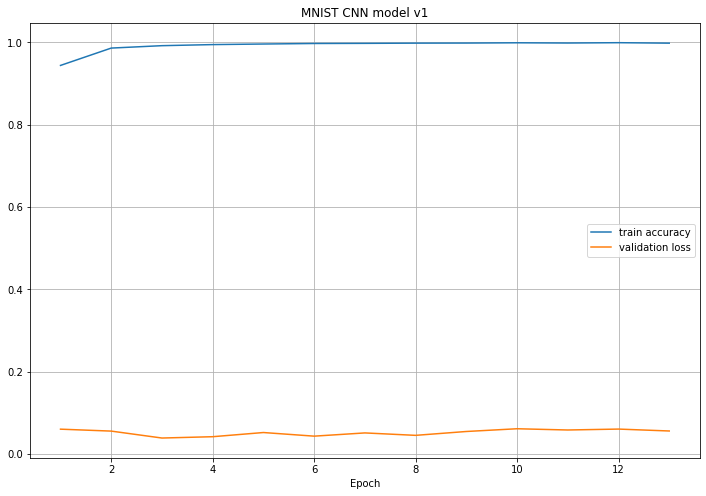

In [13]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train accuracy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('MNIST CNN model v1')
plt.show()